<a href="https://colab.research.google.com/github/pschofield2/machine_learning/blob/main/Analyzing_Actual_Win_vs_Expected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Win Totals vs Actual Wins for Each NFL Team in 2022 Regular Season

Every year, "Total Wins" betting lines come out for each NFL team before the season starts. These can be thought of as "Expected Wins". For example, the Dallas Cowboys' Total Wins line was set at 10, meaning bettors could bet the Cowboys winning over or under 10 games with relatively identical payouts.

In this workbook, I am going to visualize how each NFL team actually performed relative to their pre-season expectations in terms of wins.

In [1]:
# install package for importing nfl schedule data
!pip install nfl_data_py --upgrade --quiet

In [2]:
# import libraries

import nfl_data_py as nfl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

## Scrape website to get win total lines for each team.


---
We can scrape [this website](https://www.thelines.com/odds/nfl-win-totals/) to get the necessary projected wins data.

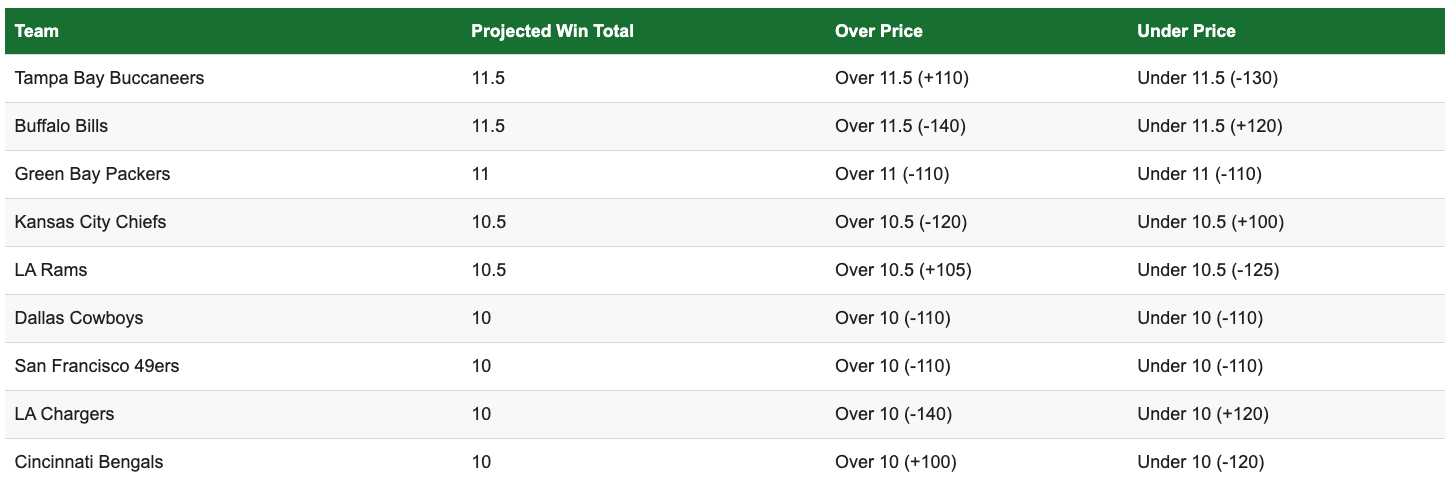

In [3]:
# request access to website server
page = requests.get('https://www.thelines.com/odds/nfl-win-totals/') 
# instantiate Beautiful Soup Object by passing response object's html text and parse html
soup = BeautifulSoup(page.text, 'html.parser')

I can tell the data we need is in a table element, so let's look at all of the tables on the page to find which one we need.

In [4]:
soup.find_all('table')

[<table class="tablepress tablepress-id-1434 tablepress-responsive" id="tablepress-1434">
 <thead>
 <tr class="row-1 odd">
 <th class="column-1">Team</th><th class="column-2">Projected Win Total</th><th class="column-3">Over Price</th><th class="column-4">Under Price</th>
 </tr>
 </thead>
 <tbody class="row-hover">
 <tr class="row-2 even">
 <td class="column-1">Tampa Bay Buccaneers</td><td class="column-2">11.5</td><td class="column-3">Over 11.5 (+110)</td><td class="column-4">Under 11.5 (-130)</td>
 </tr>
 <tr class="row-3 odd">
 <td class="column-1">Buffalo Bills</td><td class="column-2">11.5</td><td class="column-3">Over 11.5 (-140)</td><td class="column-4">Under 11.5 (+120)</td>
 </tr>
 <tr class="row-4 even">
 <td class="column-1">Green Bay Packers</td><td class="column-2">11</td><td class="column-3">Over 11 (-110)</td><td class="column-4">Under 11 (-110)</td>
 </tr>
 <tr class="row-5 odd">
 <td class="column-1">Kansas City Chiefs</td><td class="column-2">10.5</td><td class="colum

In [5]:
# Let's print the classes of each table in the html.
print('Classes of each table:')
for table in soup.find_all('table'):
    print(table.get('class'))

Classes of each table:
['tablepress', 'tablepress-id-1434', 'tablepress-responsive']
['tablepress', 'tablepress-id-1041', 'tablepress-responsive']


In [6]:
# the table we need contains the class 'tablepress-id-1434', let's extract it
table = soup.find('table', class_='tablepress-id-1434')
table.prettify()

'<table class="tablepress tablepress-id-1434 tablepress-responsive" id="tablepress-1434">\n <thead>\n  <tr class="row-1 odd">\n   <th class="column-1">\n    Team\n   </th>\n   <th class="column-2">\n    Projected Win Total\n   </th>\n   <th class="column-3">\n    Over Price\n   </th>\n   <th class="column-4">\n    Under Price\n   </th>\n  </tr>\n </thead>\n <tbody class="row-hover">\n  <tr class="row-2 even">\n   <td class="column-1">\n    Tampa Bay Buccaneers\n   </td>\n   <td class="column-2">\n    11.5\n   </td>\n   <td class="column-3">\n    Over 11.5 (+110)\n   </td>\n   <td class="column-4">\n    Under 11.5 (-130)\n   </td>\n  </tr>\n  <tr class="row-3 odd">\n   <td class="column-1">\n    Buffalo Bills\n   </td>\n   <td class="column-2">\n    11.5\n   </td>\n   <td class="column-3">\n    Over 11.5 (-140)\n   </td>\n   <td class="column-4">\n    Under 11.5 (+120)\n   </td>\n  </tr>\n  <tr class="row-4 even">\n   <td class="column-1">\n    Green Bay Packers\n   </td>\n   <td class=

In [7]:
# create an empty dataframe containing columns for the data we are going to extract and store in them.
projected_wins_df = pd.DataFrame(columns = ['team_name','proj_wins'])
projected_wins_df.head()

,team_name,proj_wins


In [8]:
for row in table.tbody.find_all('tr'): # iterate through each row in the table ('tr' is the html element meaning 'table row')
  columns = row.find_all('td') # return data for each column in the row and store in columns variable
  
  if(columns != []): # if columns  not an empty list (if there is data)....
    team = columns[0].text.strip() # strip the team name (first column)
    win_totals = columns[1].text.strip() # strip the projected wins (second column)

    # insert the data into projected_wins_df
    projected_wins_df = projected_wins_df.append({'team_name':team,
                                                  'proj_wins': win_totals},ignore_index = True)

<ipython-input-8-c3daa73ee83a>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  projected_wins_df = projected_wins_df.append({'team_name':team,
<ipython-input-8-c3daa73ee83a>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  projected_wins_df = projected_wins_df.append({'team_name':team,
<ipython-input-8-c3daa73ee83a>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  projected_wins_df = projected_wins_df.append({'team_name':team,
<ipython-input-8-c3daa73ee83a>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  projected_wins_df = projected_wins_df.append({'team_name':team,
<ipython-input-8-c3daa73ee83a>:9: FutureWarning: The frame.append me

In [9]:
# let's take a look at our populated projected_wins_df dataframe and make sure there are 32 teams and that the data looks right.
projected_wins_df.head(32)

,team_name,proj_wins
0,Tampa Bay Buccaneers,11.5
1,Buffalo Bills,11.5
2,Green Bay Packers,11
3,Kansas City Chiefs,10.5
4,LA Rams,10.5
5,Dallas Cowboys,10
6,San Francisco 49ers,10
7,LA Chargers,10
8,Cincinnati Bengals,10
9,Denver Broncos,10


## Looking Good! Now Let's Get Actual Wins Using the nfl_data_py Library

Documentation: https://pypi.org/project/nfl-data-py/

In [10]:
# import 2022 schedule data where we can get 2022 game outcome data
schedule_df = nfl.import_schedules([2022])

# take a look at each column name
for column in schedule_df.columns:
  print(column)

game_id
season
game_type
week
gameday
weekday
gametime
away_team
away_score
home_team
home_score
location
result
total
overtime
old_game_id
gsis
nfl_detail_id
pfr
pff
espn
away_rest
home_rest
away_moneyline
home_moneyline
spread_line
away_spread_odds
home_spread_odds
total_line
under_odds
over_odds
div_game
roof
surface
temp
wind
away_qb_id
home_qb_id
away_qb_name
home_qb_name
away_coach
home_coach
referee
stadium_id
stadium


In [11]:
# preview the data
pd.set_option('display.max_columns',None)
schedule_df.head()

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,home_score,location,result,total,overtime,old_game_id,gsis,nfl_detail_id,pfr,pff,espn,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,roof,surface,temp,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
6137,2022_01_BUF_LA,2022,REG,1,2022-09-08,Thursday,20:20,BUF,31.0,LA,10.0,Home,-21.0,41.0,0.0,2022090800,NaN,NaN,202209080ram,NaN,401437654,7,7,-117.0,106.0,-1.0,-112.0,101.0,51.5,-101.0,-111.0,0,dome,matrixturf,NaN,NaN,00-0034857,00-0026498,Josh Allen,Matthew Stafford,Sean McDermott,Sean McVay,Carl Cheffers,LAX01,SoFi Stadium
6138,2022_01_NO_ATL,2022,REG,1,2022-09-11,Sunday,13:00,NO,27.0,ATL,26.0,Home,-1.0,53.0,0.0,2022091100,NaN,NaN,202209110atl,NaN,401437650,7,7,-228.0,201.0,-6.0,-103.0,-107.0,43.5,-104.0,-108.0,1,closed,fieldturf,NaN,NaN,00-0031503,00-0032268,Jameis Winston,Marcus Mariota,Dennis Allen,Arthur Smith,Alex Kemp,ATL97,Mercedes-Benz Stadium
6139,2022_01_CLE_CAR,2022,REG,1,2022-09-11,Sunday,13:00,CLE,26.0,CAR,24.0,Home,-2.0,50.0,0.0,2022091101,NaN,NaN,202209110car,NaN,401437651,7,7,114.0,-125.0,2.5,-112.0,102.0,42.5,-113.0,100.0,0,outdoors,grass,NaN,NaN,00-0033119,00-0034855,Jacoby Brissett,Baker Mayfield,Kevin Stefanski,Matt Rhule,Brad Rogers,CAR00,Bank of America Stadium
6140,2022_01_SF_CHI,2022,REG,1,2022-09-11,Sunday,13:00,SF,10.0,CHI,19.0,Home,9.0,29.0,0.0,2022091102,NaN,NaN,202209110chi,NaN,401437647,7,7,-248.0,217.0,-6.5,100.0,-111.0,38.0,-103.0,-109.0,0,outdoors,grass,NaN,NaN,00-0037012,00-0036945,Trey Lance,Justin Fields,Kyle Shanahan,Matt Eberflus,Clay Martin,CHI98,Soldier Field
6141,2022_01_PIT_CIN,2022,REG,1,2022-09-11,Sunday,13:00,PIT,23.0,CIN,20.0,Home,-3.0,43.0,1.0,2022091103,NaN,NaN,202209110cin,NaN,401437634,7,7,264.0,-308.0,7.5,-119.0,107.0,44.5,101.0,-113.0,1,outdoors,fieldturf,NaN,NaN,00-0033869,00-0036442,Mitch Trubisky,Joe Burrow,Mike Tomlin,Zac Taylor,Shawn Hochuli,CIN00,Paycor Stadium


We need to use this schedule data to come up with a way to count the number of wins for each team. There is no column that explicitly states the winning team, but we can use the home_score and away_score column to figure it out, since we also know the home and away teams.

In [12]:
# start by filtering on regular season games since the projected wins doesn't include playoffs or pre-season
schedule_df = schedule_df[schedule_df['game_type'] == 'REG']
schedule_df['game_type'].value_counts() # make sure code worked, should only see REG

REG    271
Name: game_type, dtype: int64

In [13]:
""" 
The gameplan here is to filter schedule_df on each nfl team, count their wins, and store the results in a new dataframe.
For each team, if they are home and the home_score is greater than the away score, it's a win.
If they are the away team and the away_score is greater than the home score, it's a win.

So first we will instantiate an empty dictionary with the keys 'team_abbr' and 'wins' with empty lists as values.
Then we will loop through each team, count the wins, and update the dictionary.

Finally, we will create a dataframe out of the dictionary to combine actual wins with projected wins/

"""
# instantiate dictionary to keep track of wins for each team
team_wins = {'team_abbr':[],
        'wins': []}

# get unique teams
teams = schedule_df['home_team'].unique()

# for each team...
for team in teams:
  
  # start w/ 0 wins
  wins = 0
  
  # filter on team and store their game results in team_df
  team_df = schedule_df.loc[(schedule_df['away_team'] == team) | (schedule_df['home_team'] == team)]

  # iterate through each game for that team
  for _, row in team_df.iterrows():

    # if the team won, add 1 to wins
    if (row['home_team'] == team and row['home_score'] > row['away_score']) or (row['away_team'] == team and row['away_score'] > row['home_score']):
      wins +=1
  
  # insert the team and their wins into the dictionary
  team_wins['team_abbr'].append(team)
  team_wins['wins'].append(wins)

# create record_df dataframe from dictionary and sort by wins descending
team_wins_df = pd.DataFrame(team_wins).sort_values(by='wins',ascending = False)
# make sure there are 32 teams and results are correct
team_wins_df.head(32)

,team_abbr,wins
16,KC,14
28,PHI,14
27,BUF,13
23,SF,13
12,MIN,13
4,CIN,12
14,DAL,12
11,LAC,10
17,BAL,10
15,SEA,9


## Combine our projected wins dataframe with our actual wins dataframe....

There is a slight problem. Our two datafames don't have a column with common values to join on, as projected_wins_df has the full team name, and the team_wins_df has the abbreviated team name.

Luckily, we can import metadata about each NFL team using nfl.import_team_desc(), which has both the abbreviation and full team name, and use this as a medium to join the two dataframes.


In [14]:
nfl_teams_df = nfl.import_team_desc()[['team_abbr','team_name']]
nfl_teams_df.head(32)

,team_abbr,team_name
0,ARI,Arizona Cardinals
1,ATL,Atlanta Falcons
2,BAL,Baltimore Ravens
3,BUF,Buffalo Bills
4,CAR,Carolina Panthers
5,CHI,Chicago Bears
6,CIN,Cincinnati Bengals
7,CLE,Cleveland Browns
8,DAL,Dallas Cowboys
9,DEN,Denver Broncos


It looks like the nfl_teams_df dataframe uses 'Los Angeles' instead of 'LA', which projected_wins_df uses for the Chargers and Rams. Let's replace these values in projected_wins_df so we have a complete match.

In [15]:
projected_wins_df.replace('LA Chargers','Los Angeles Chargers',inplace= True)
projected_wins_df.replace('LA Rams','Los Angeles Rams',inplace= True)
projected_wins_df.head(32)

,team_name,proj_wins
0,Tampa Bay Buccaneers,11.5
1,Buffalo Bills,11.5
2,Green Bay Packers,11
3,Kansas City Chiefs,10.5
4,Los Angeles Rams,10.5
5,Dallas Cowboys,10
6,San Francisco 49ers,10
7,Los Angeles Chargers,10
8,Cincinnati Bengals,10
9,Denver Broncos,10


Great, now we can merge team_wins_df to nfl_teams_df to get the team abbreviation, which can be used to merge to projected_wins_df to get projected wins.

In [16]:
# merge to record_df on team_abbr

team_wins_df = team_wins_df.merge(nfl_teams_df, how = 'inner', on = 'team_abbr')
team_wins_df.head(32)

,team_abbr,wins,team_name
0,KC,14,Kansas City Chiefs
1,PHI,14,Philadelphia Eagles
2,BUF,13,Buffalo Bills
3,SF,13,San Francisco 49ers
4,MIN,13,Minnesota Vikings
5,CIN,12,Cincinnati Bengals
6,DAL,12,Dallas Cowboys
7,LAC,10,Los Angeles Chargers
8,BAL,10,Baltimore Ravens
9,SEA,9,Seattle Seahawks


In [17]:
# merge to projected df on team_name
new_df = team_wins_df.merge(projected_wins_df, how = 'left', on = 'team_name')
new_df.head(32)

,team_abbr,wins,team_name,proj_wins
0,KC,14,Kansas City Chiefs,10.5
1,PHI,14,Philadelphia Eagles,9.5
2,BUF,13,Buffalo Bills,11.5
3,SF,13,San Francisco 49ers,10
4,MIN,13,Minnesota Vikings,9
5,CIN,12,Cincinnati Bengals,10
6,DAL,12,Dallas Cowboys,10
7,LAC,10,Los Angeles Chargers,10
8,BAL,10,Baltimore Ravens,9.5
9,SEA,9,Seattle Seahawks,5.5


In [18]:
# let's set index as team_abbr and move team_name to first column

first_column = new_df.pop('team_name') # remove team_name column and save as variable
new_df.insert(0, 'team_name',first_column) # insert team_name back into new_df as first column

new_df = new_df.set_index('team_abbr') # set index to team_abbr
new_df.head()

,team_name,wins,proj_wins
team_abbr,,,
KC,Kansas City Chiefs,14,10.5
PHI,Philadelphia Eagles,14,9.5
BUF,Buffalo Bills,13,11.5
SF,San Francisco 49ers,13,10
MIN,Minnesota Vikings,13,9


In [19]:
new_df['proj_wins'] = new_df['proj_wins'].astype('float') # convert proj_win to float (from string dtype)
new_df['win_difference'] = new_df['wins'] - new_df['proj_wins'] # create new column for win_difference. (wins above or below projected)
new_df = new_df.sort_values(by = 'win_difference', ascending = False) # sort by win_difference descending so that we put over performing teams at top and underperforming teams at bottom
new_df.head()

,team_name,wins,proj_wins,win_difference
team_abbr,,,,
PHI,Philadelphia Eagles,14,9.5,4.5
MIN,Minnesota Vikings,13,9.0,4.0
KC,Kansas City Chiefs,14,10.5,3.5
SEA,Seattle Seahawks,9,5.5,3.5
SF,San Francisco 49ers,13,10.0,3.0


In [20]:
# look at under-performing teams
new_df.tail()

,team_name,wins,proj_wins,win_difference
team_abbr,,,,
CHI,Chicago Bears,3,6.5,-3.5
ARI,Arizona Cardinals,4,8.5,-4.5
DEN,Denver Broncos,5,10.0,-5.0
LA,Los Angeles Rams,5,10.5,-5.5
IND,Indianapolis Colts,4,10.0,-6.0


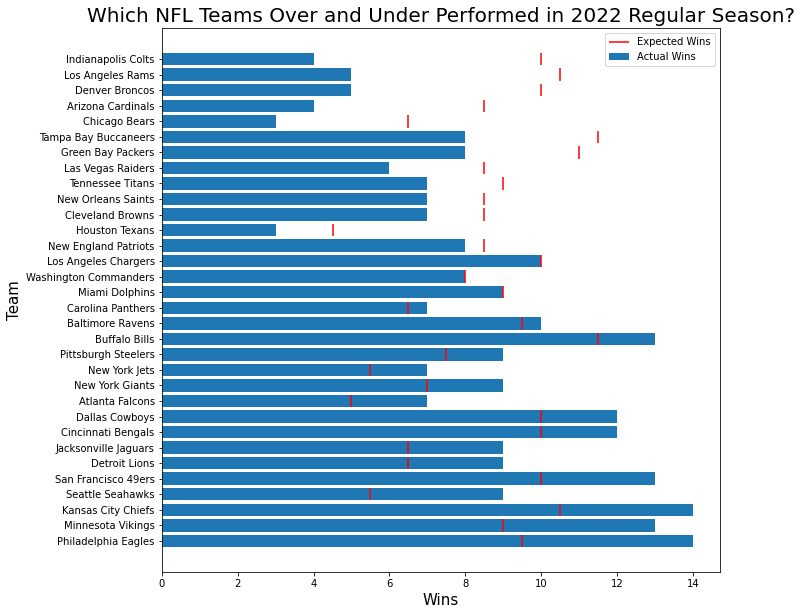

In [27]:
# Now we can easily visualize the top over and under performers by using a horizontal bar chart and using bars to vizualize actual wins and a line to visualize projected wins.

i = 0 # set index location to 0. Need this to plot expected win lines for each team.

fig, ax = plt.subplots(figsize = (10,10))

# plot wins by team
ax.barh(new_df['team_name'], new_df['wins'], label = 'Actual Wins')

# iterate through each team in the new_df dataframe
for index, row in new_df.iterrows():
  
  # draw a vertical line using the i variable as a reference coordinate to draw the line
  ax.vlines(row['proj_wins'], ymin = i - 0.4, ymax = i + 0.4, colors = 'red', label = 'Expected Wins' if i == 0 else '')

  # add 1 to i for the next team's lines
  i+=1

# format axis
ax.set_title('Which NFL Teams Over and Under Performed in 2022 Regular Season?', fontsize = 20)
ax.set_xlabel('Wins', fontsize = 15)
ax.set_ylabel('Team', fontsize = 15)
ax.legend();

# Conclusion

We can now easily see that relative to projections, the Colts, Rams, Broncos and Cardinals underperformed the most, and the Eagles, Vikings, Chiefs and 49ers overperformed the most.

Some interesting takeaways:


1.   It's very hard to fathom how bad the Colts' offense performed this year after seemingly upgrading from Carson Wentz to Matt Ryan. What a trainwreck season for them after barely missing the playoffs last year.
2.   Pretty surprising how low the Chiefs' projected wins was for a team that has a generational QB in Patrick Mahomes and one of the best playcallers ever in Andy Reid. They also haven't lost more than 4 games in a season since 2017. Remind me to bet the over the next time the line for Mahomes/Reid is 10.5

